In [148]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import folium
import numpy as np

In [341]:
df = pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수.csv")

In [342]:
df

,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,만2세남자,만3세남자,...,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자,통계년월
0,서울특별시,종로구,청운동,2314,1149,1165,4,6,7,7,...,0,0,0,0,0,0,0,0,0,2022-08-22
1,서울특별시,종로구,신교동,1397,628,769,1,2,3,1,...,0,0,0,0,0,0,0,0,0,2022-08-22
2,서울특별시,종로구,궁정동,252,105,147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-08-22
3,서울특별시,종로구,효자동,574,256,318,1,0,3,1,...,0,0,0,0,0,0,0,0,0,2022-08-22
4,서울특별시,종로구,창성동,446,185,261,1,1,0,2,...,0,0,0,0,0,0,0,0,0,2022-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,서울특별시,강동구,둔촌동,24760,12212,12548,84,70,72,71,...,0,1,0,0,0,0,0,0,0,2022-01-31
3201,서울특별시,강동구,암사동,67598,33228,34370,178,177,258,241,...,0,1,0,0,1,0,0,0,0,2022-01-31
3202,서울특별시,강동구,성내동,66439,32492,33947,148,170,164,175,...,1,1,1,2,0,1,0,0,1,2022-01-31
3203,서울특별시,강동구,천호동,86351,42290,44061,275,209,194,206,...,2,0,0,1,0,0,0,0,0,2022-01-31


In [344]:
total = df[["시군구명", "읍면동명", "계", "통계년월"]]

In [277]:
df["20-39여성"] = df.iloc[:, 137:157].sum(axis=1)

In [278]:
df["65세이상남자"] = df.iloc[:, 71:117].sum(axis=1)

In [279]:
df["65세이상여자"] = df.iloc[:, 182:228].sum(axis=1)

In [280]:
df["소멸위험지수"] = df["20-39여성"] / (df["65세이상남자"] + df["65세이상여자"])

In [281]:
df = df[["시군구명", "읍면동명", "통계년월", "소멸위험지수"]]

In [298]:
df["소멸위험지수"].describe()

count    3176.000000
mean             inf
std              NaN
min         0.000000
25%         0.621356
50%         0.850204
75%         1.178059
max              inf
Name: 소멸위험지수, dtype: float64

In [282]:
df_f = df.copy()

In [345]:
df_f

,시군구명,읍면동명,통계년월,소멸위험지수
0,종로구,청운동,2022-08-22,0.589242
1,종로구,신교동,2022-08-22,0.906103
2,종로구,궁정동,2022-08-22,1.046512
3,종로구,효자동,2022-08-22,0.989011
4,종로구,창성동,2022-08-22,0.736264
...,...,...,...,...
452,강동구,둔촌동,2022-08-22,0.790270
453,강동구,암사동,2022-08-22,0.773737
454,강동구,성내동,2022-08-22,0.891198
455,강동구,천호동,2022-08-22,0.886625


In [283]:
plt.rc('font', family='Malgun Gothic')

In [284]:
df_f = df[df["통계년월"] == "2022-08-22"]

In [346]:
df_f = total[total["통계년월"] == '2022-08-22']

In [347]:
df_f.iloc[:,1]

0      청운동
1      신교동
2      궁정동
3      효자동
4      창성동
      ... 
452    둔촌동
453    암사동
454    성내동
455    천호동
456    강일동
Name: 읍면동명, Length: 457, dtype: object

In [285]:
df_f.head(20)

,시군구명,읍면동명,통계년월,소멸위험지수
0,종로구,청운동,2022-08-22,0.589242
1,종로구,신교동,2022-08-22,0.906103
2,종로구,궁정동,2022-08-22,1.046512
3,종로구,효자동,2022-08-22,0.989011
4,종로구,창성동,2022-08-22,0.736264
5,종로구,통의동,2022-08-22,1.018868
6,종로구,적선동,2022-08-22,0.600000
7,종로구,통인동,2022-08-22,0.477157
8,종로구,누상동,2022-08-22,0.776596
9,종로구,누하동,2022-08-22,0.716763


In [286]:
df_f = df_f.replace([np.inf, np.nan], df_f[df_f["시군구명"] == '종로구']["소멸위험지수"].median())

In [211]:
#df_f["소멸위험지수"] = df_f["소멸위험지수"]

In [287]:
df_f[df_f["시군구명"] == '서초구']["소멸위험지수"].unique()

array([0.82470835, 1.11460633, 0.68145332, 0.21428571, 0.89266222,
       0.98679039, 1.0990905 , 0.61484325, 0.35251799, 0.71217949])

In [350]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    tiles='OpenStreetMap',
)

folium.Choropleth(
    geo_data = geo_json,
    name='choropleth',
    data=df_f,
    columns=['시군구명', '계'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

In [294]:
region = df_f[df_f["시군구명"] == "서초구"]
region

,시군구명,읍면동명,통계년월,소멸위험지수
411,서초구,방배동,2022-08-22,0.824708
412,서초구,양재동,2022-08-22,1.114606
413,서초구,우면동,2022-08-22,0.681453
414,서초구,원지동,2022-08-22,0.214286
415,서초구,잠원동,2022-08-22,0.892662
416,서초구,반포동,2022-08-22,0.986790
417,서초구,서초동,2022-08-22,1.099091
418,서초구,내곡동,2022-08-22,0.614843
419,서초구,염곡동,2022-08-22,0.352518
420,서초구,신원동,2022-08-22,0.712179


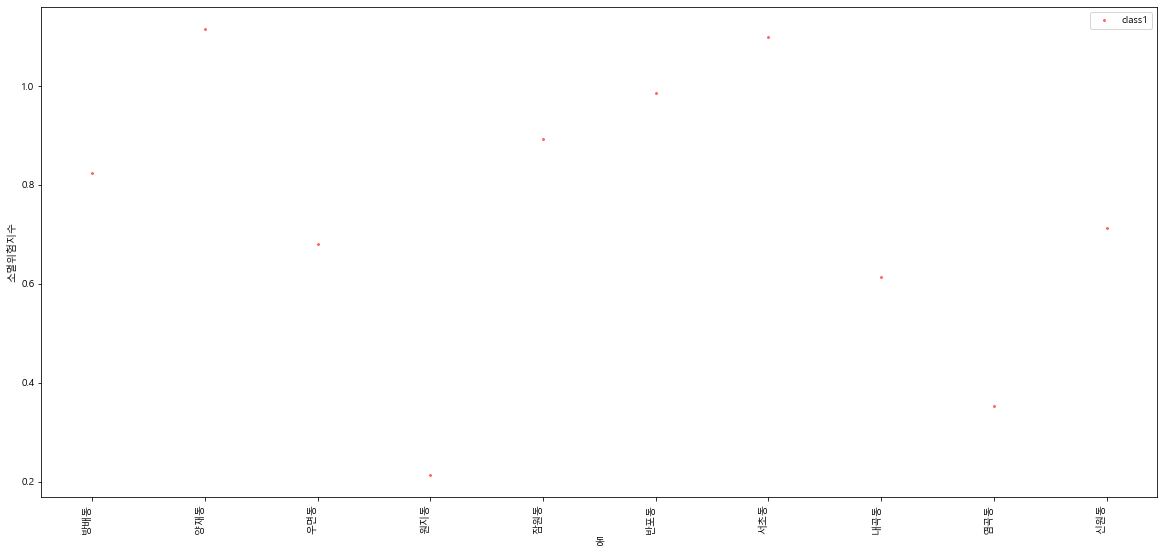

In [297]:
#시계열 고려해서 해야함

fig = plt.figure(figsize=(20,10))
X = region

plt.plot(  X.iloc[:,1]
         , X.iloc[:,3]
         , 'o'
         , markersize=2
         , color='red'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('동')
plt.ylabel('소멸위험지수')
plt.xlabel('동', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.legend()
plt.show()

1.5 : 소멸 저위험 지역
1.0 - 1.5 : 일반 지역
0.5 - 1.0 : 소멸 주의 지역
0.5 : 소멸 위험 지역

In [332]:
#소멸 저위험 지역
a = df[df["소멸위험지수"] > 1.5]["읍면동명"].unique()
print(a)

['서린동' '원남동' '연지동' '효제동' '연건동' '명륜4가' '교북동' '충무로2가' '충무로5가' '을지로6가' '오장동'
 '저동2가' '흥인동' '정동' '순화동' '의주로1가' '만리동2가' '청파동3가' '원효로1가' '문배동' '한강로1가'
 '한강로2가' '상왕십리동' '도선동' '능동' '화양동' '신설동' '회기동' '동소문동6가' '동선동1가' '동선동2가'
 '동선동3가' '동선동4가' '안암동2가' '안암동5가' '보문동1가' '보문동2가' '합동' '대현동' '대신동' '신촌동'
 '창천동' '토정동' '노고산동' '상수동' '서교동' '동교동' '마곡동' '가산동' '영등포동1가' '영등포동2가'
 '영등포동3가' '영등포동4가' '영등포동6가' '영등포동7가' '영등포동8가' '당산동6가' '당산동' '문래동6가'
 '양평동2가' '양평동3가' '양평동4가' '양평동5가' '양평동6가' '상도1동' '역삼동' '논현동' '항동' '염창동'
 '안암동1가' '무학동' '삼전동' '동소문동1가' '당산동4가']


In [333]:
num_values = len(set(a))
print(num_values)

74


In [334]:
#일반 지역
b = df[(df["소멸위험지수"] < 1.5) & (df["소멸위험지수"] > 1.0)]["읍면동명"].unique()
print(b)

['궁정동' '통의동' '내수동' '신문로2가' '종로1가' '경운동' '관철동' '관수동' '인의동' '혜화동' '명륜1가'
 '명륜2가' '명륜3가' '숭인동' '평동' '묵정동' '필동3가' '을지로5가' '무학동' '황학동' '만리동1가' '청파동1가'
 '청파동2가' '원효로3가' '효창동' '신계동' '하왕십리동' '사근동' '행당동' '금호동2가' '성수동1가' '용답동'
 '구의동' '군자동' '용두동' '휘경동' '상봉동' '성북동1가' '동소문동1가' '동소문동4가' '동소문동7가' '삼선동2가'
 '삼선동4가' '삼선동5가' '동선동5가' '안암동1가' '안암동4가' '보문동6가' '충정로2가' '충정로3가' '연희동'
 '아현동' '공덕동' '신공덕동' '마포동' '대흥동' '염리동' '신수동' '현석동' '창전동' '하중동' '신정동' '당인동'
 '합정동' '망원동' '연남동' '성산동' '상암동' '염창동' '등촌동' '신도림동' '항동' '당산동1가' '당산동2가'
 '당산동3가' '당산동4가' '당산동5가' '문래동5가' '양평동1가' '대방동' '신대방동' '봉천동' '신림동' '남현동'
 '양재동' '서초동' '청담동' '삼성동' '송파동' '석촌동' '삼전동' '가락동' '문정동' '장지동' '방이동' '상일동'
 '명륜4가' '화곡동' '동숭동' '송월동' '광장동' '보문동4가' '신사동' '용문동' '보문동1가' '반포동' '충무로3가'
 '목동' '효자동' '교남동' '을지로2가' '북아현동' '도화동' '자곡동']


In [335]:
num_values = len(set(b))
print(num_values)

114


In [336]:
#소멸 주의 지역
c = df[(df["소멸위험지수"] < 1.0) & (df["소멸위험지수"] > 0.5)]["읍면동명"].unique()
print(c)

['청운동' '신교동' '효자동' '창성동' '적선동' '누상동' '누하동' '옥인동' '체부동' '필운동' '사직동' '수송동'
 '견지동' '운니동' '익선동' '삼청동' '화동' '가회동' '원서동' '이화동' '충신동' '동숭동' '창신동' '교남동'
 '송월동' '홍파동' '행촌동' '구기동' '평창동' '부암동' '홍지동' '신영동' '무악동' '을지로2가' '회현동2가'
 '남산동2가' '남산동3가' '충무로4가' '필동1가' '예장동' '장충동1가' '장충동2가' '광희동2가' '쌍림동'
 '을지로4가' '신당동' '중림동' '후암동' '용산동2가' '갈월동' '동자동' '서계동' '원효로2가' '신창동' '산천동'
 '원효로4가' '도원동' '용문동' '한강로3가' '이촌동' '이태원동' '한남동' '동빙고동' '서빙고동' '주성동' '보광동'
 '홍익동' '마장동' '응봉동' '금호동1가' '금호동3가' '금호동4가' '옥수동' '성수동2가' '송정동' '중곡동' '광장동'
 '자양동' '제기동' '전농동' '답십리동' '장안동' '이문동' '면목동' '중화동' '묵동' '망우동' '신내동' '성북동'
 '돈암동' '동소문동2가' '동소문동3가' '동소문동5가' '삼선동1가' '삼선동3가' '안암동3가' '보문동5가' '보문동7가'
 '보문동3가' '정릉동' '길음동' '종암동' '하월곡동' '상월곡동' '장위동' '석관동' '미아동' '수유동' '쌍문동'
 '방학동' '창동' '월계동' '공릉동' '하계동' '상계동' '중계동' '수색동' '녹번동' '불광동' '갈현동' '구산동'
 '대조동' '응암동' '역촌동' '신사동' '증산동' '진관동' '미근동' '냉천동' '천연동' '영천동' '현저동' '북아현동'
 '홍제동' '봉원동' '홍은동' '북가좌동' '남가좌동' '도화동' '용강동' '구수동' '중동' '신정동' '목동' '신월동'
 '화곡동' '가양동' '내발산동' '외발산동' '공항동' '방화동' '구로동' '가리봉동' '고척동'

In [337]:
num_values = len(set(c))
print(num_values)

217


In [338]:
#소멸 위험 지역
d = df[df["소멸위험지수"] < 0.5]["읍면동명"].unique()
print(d)

['통인동' '내자동' '당주동' '신문로1가' '청진동' '중학동' '공평동' '관훈동' '와룡동' '권농동' '인사동' '낙원동'
 '종로2가' '팔판동' '안국동' '소격동' '재동' '묘동' '봉익동' '돈의동' '장사동' '종로3가' '예지동' '종로4가'
 '종로5가' '종로6가' '무교동' '다동' '삼각동' '장교동' '소공동' '남창동' '북창동' '태평로2가' '남대문로3가'
 '남대문로4가' '남대문로5가' '봉래동1가' '봉래동2가' '회현동1가' '회현동3가' '충무로1가' '명동1가' '명동2가'
 '남산동1가' '인현동2가' '예관동' '필동2가' '남학동' '주자동' '광희동1가' '을지로7가' '주교동' '방산동'
 '을지로3가' '입정동' '산림동' '초동' '인현동1가' '서소문동' '충정로1가' '의주로2가' '남영동' '청암동'
 '용산동3가' '용산동5가' '청량리동' '번동' '우이동' '도봉동' '옥천동' '개화동' '오곡동' '오쇠동' '영등포동5가'
 '문래동1가' '원지동' '염곡동' '수서동' '마천동' '수표동' '망우동' '동소문동2가' '수송동' '수유2동' '세종로'
 '저동1가' '문래동2가']


In [339]:
num_values = len(set(d))
print(num_values)

88
